In [1]:
# Group Members: Sara Meschi, Maryam Aliakbari, Mohammad Mohammadi

In [2]:
import requests
from bs4 import BeautifulSoup
import pandas

In [3]:
result = requests.get("https://en.wikipedia.org/wiki/List_of_countries_and_dependencies_by_population_density")
content = result.content
soup = BeautifulSoup(content, "html.parser")

In [4]:
list_of_country = soup.find('table',attrs={"class":"sortable"})
table_dic = {}
for row in list_of_country.findAll("tr"):
    columns = row.findAll("td")
#     print(len((row.find_all('a', attrs={"title": "Population density"}))))
    if (len(columns) > 0):
         if not len(row.find_all('a', attrs={"title": "Population density"}))>0:
            country_name = columns[1].text.strip()
            area_in_km = columns[2].text.replace(',','')
            area_in_mi = columns[3].text.replace(',','')
            population = columns[4].text.replace(',','')
            table_dic[country_name] = {'area_km2': float(area_in_km),
                                      'area_mi2': float(area_in_mi),  
                                     'population': int(population)}  

In [5]:
Data = pandas.DataFrame.from_dict(table_dic, orient= 'index')
Data

,area_km2,area_mi2,population
Macau (China),115.30,45.00,696100
Monaco,2.02,0.78,38300
Singapore,722.50,279.00,5703600
Hong Kong (China),1106.00,427.00,7500700
Gibraltar (United Kingdom),6.80,2.60,33701
...,...,...,...
Mongolia,1564100.00,603902.00,3238479
Pitcairn Islands (United Kingdom),47.30,18.00,56
Falkland Islands (United Kingdom),12173.00,4700.00,2563
Svalbard and Jan Mayen (Norway),61399.00,23706.00,2655


In [6]:
Data.describe()

,area_km2,area_mi2,population
count,2.510000e+02,2.510000e+02,2.510000e+02
mean,5.432938e+05,2.097769e+05,3.047293e+07
std,1.716009e+06,6.625517e+05,1.283047e+08
min,4.900000e-01,1.900000e-01,5.600000e+01
25%,1.590200e+03,6.740000e+02,2.638290e+05
50%,6.456200e+04,2.492800e+04,4.475353e+06
75%,3.495840e+05,1.349750e+05,1.764158e+07
max,1.712524e+07,6.612093e+06,1.405181e+09


In [7]:
Data.corr(method='pearson').style.background_gradient(cmap='rainbow')

,area_km2,area_mi2,population
area_km2,1.000000,1.000000,0.459150
area_mi2,1.000000,1.000000,0.459149
population,0.459150,0.459149,1.000000


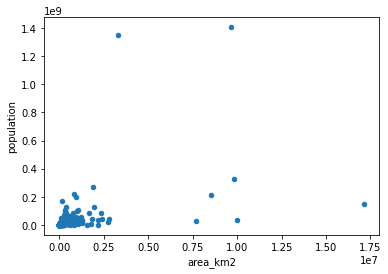

In [8]:
Data.plot.scatter(x = "area_km2", y = "population")